In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # opcional para visuales
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scipy.stats as stats

RND = 42
np.random.seed(RND)

n = 25 datos que se denomina MustangPrice. Cargarlo en R con la instruccion data("MustangPrice").
Los datos corresponden a 25 automoviles Mustang usados que se ofrecen a la venta en un sitio de internet en determinado momento. Se registraron las variables: Age, edad (en anos), Miles, kilometraje
(en millas) y Price, precio de venta (en miles de dolares) para cada automovil de la muestra. Nos enfocaremos en la correlacion entre las variables Price y Miles. Recordemos que si (X, Y ) es un
vector aleatorio con distribucion conjunta F, [...]


a) Realizar un grafico de Price contra Miles. Estimar la correlacion entre Price y Miles usando los datos originales.

In [3]:
MustangPrice = pd.read_csv("MustangPrice.csv")
MustangPrice.head()

,Age,Miles,Price
0,6,8.5,32.0
1,7,33.0,45.0
2,9,82.8,11.9
3,2,7.0,24.8
4,3,23.0,22.0


Text(0, 0.5, 'Cantidad de Millas')

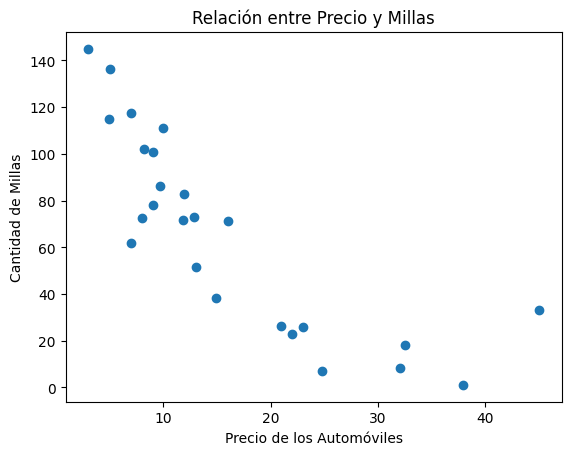

In [5]:
plt.scatter(MustangPrice["Price"], MustangPrice["Miles"])
plt.title("Relación entre Precio y Millas")
plt.xlabel("Precio de los Automóviles")
plt.ylabel("Cantidad de Millas")

In [ ]:
price = MustangPrice["Price"]
miles = MustangPrice["Miles"]

correlacion_matriz = price.corr(miles) #precio.correlacion_con(millas)
print(f"La correlacion entre precio y millas es: {correlacion_matriz}")

La correlacion entre precio y millas es: -0.8246164149023745


El valor negativo que obtenemos, indica que cuando una variable aumenta de valor, la otra baja. Lo cual tiene mucho sentido en nuestro contexto


b) Describir un mecanismo que permita computar un estimador bootstrapeado de la correlacion entre Price y Miles.

c) Generar B = 5000 muestras bootstrap y computar para cada una de ellas el estimador bootstrapeado de la correlacion. Con dichos valores realizar un histograma, ¿que revela este grafico?

In [17]:
B=5000
n = len(MustangPrice)
correlaciones = np.empty(B)

for i in range(B):
    #Como vamos a trabajar con un df, implementamos df.sample() y tomamos muestras aleatorias
    muestra = MustangPrice.sample(n=n , replace=True)
    correlaciones[i] = price.corr(miles)

Text(0.5, 1.0, 'Distribución de corelación')

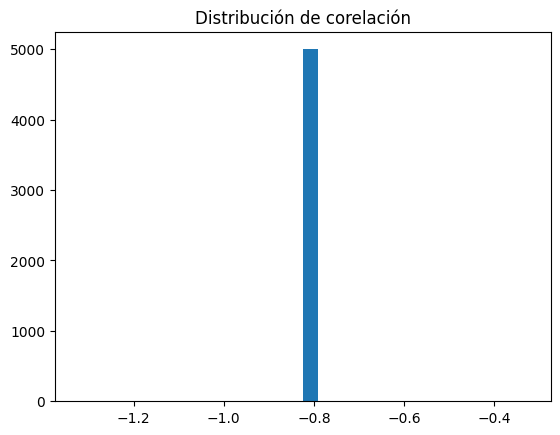

In [18]:
plt.hist( correlaciones, bins = 30)
plt.title("Distribución de corelación")

In [19]:
#Observamos que es muy fuerte y estable la correlacion

d) Usar el ıtem anterior para construir un intervalo bootstrap percentil de nivel 0.95 % para la correlacion entre Price y Miles. Interpretar el intervalo obtenido.


In [20]:
conf = np.percentile(correlaciones, [2.5,97.5])
media = correlaciones.mean()
std = correlaciones.std(ddof=1)


print(f"Intervalo: {conf}.\nMedia por Boot: {media}\n Desvío std: {std}.")

Intervalo: [-0.82461641 -0.82461641].
Media por Boot: -0.8246164149023745
 Desvío std: 0.0.
